# Exploracion de datos

### Libreria

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


### Carga de datos

In [2]:
# duda lectura desde google drive 
with open('td_ztf_stamp_17_06_20.pkl', 'rb') as f:
    data = pickle.load(f)

print(data.keys())
print(data["Train"].keys())

dict_keys(['Train', 'Validation', 'Test'])
dict_keys(['images', 'labels', 'features'])


### Dimensiones del dataset

In [3]:
print("Cantidad de datos")
print("Tamaño del data set de entrenamiento: ", np.shape(data["Train"]["labels"])[0])
print("Tamaño del data set de Validacion: ", np.shape(data["Validation"]["labels"])[0])
print("Tamaño del data set de Prueba: ", np.shape(data["Test"]["labels"])[0])

Cantidad de datos
Tamaño del data set de entrenamiento:  72710
Tamaño del data set de Validacion:  500
Tamaño del data set de Prueba:  500


In [4]:
print("Cantidad de clases por set de datos")
print("Entrenamiento")
for i in range(5):
    print("clase ", i," con la cantidad ",(data["Train"]["labels"]==i).sum())
print("Validacion")
for i in range(5):
    print("clase ", i," con la cantidad ",(data["Validation"]["labels"]==i).sum())
print("Test")
for i in range(5):
    print("clase ", i," con la cantidad ",(data["Test"]["labels"]==i).sum())

Cantidad de clases por set de datos
Entrenamiento
clase  0  con la cantidad  14542
clase  1  con la cantidad  14542
clase  2  con la cantidad  14542
clase  3  con la cantidad  14542
clase  4  con la cantidad  14542
Validacion
clase  0  con la cantidad  100
clase  1  con la cantidad  100
clase  2  con la cantidad  100
clase  3  con la cantidad  100
clase  4  con la cantidad  100
Test
clase  0  con la cantidad  100
clase  1  con la cantidad  100
clase  2  con la cantidad  100
clase  3  con la cantidad  100
clase  4  con la cantidad  100


In [5]:
print("Imagenes tamaño")
print("Tamaño del data set de entrenamiento: ", np.shape(data["Train"]["images"]))
print("Tamaño del data set de Validacion: ", np.shape(data["Validation"]["images"]))
print("Tamaño del data set de Prueba: ", np.shape(data["Test"]["images"]))

Imagenes tamaño
Tamaño del data set de entrenamiento:  (72710, 63, 63, 3)
Tamaño del data set de Validacion:  (500, 63, 63, 3)
Tamaño del data set de Prueba:  (500, 63, 63, 3)


In [6]:
print("Imagenes features")
print("Tamaño del data set de entrenamiento: ", np.shape(data["Train"]["features"]))
print("Tamaño del data set de Validacion: ", np.shape(data["Validation"]["features"]))
print("Tamaño del data set de Prueba: ", np.shape(data["Test"]["features"]))

Imagenes features
Tamaño del data set de entrenamiento:  (72710, 26)
Tamaño del data set de Validacion:  (500, 26)
Tamaño del data set de Prueba:  (500, 26)


### Obtencion de algunos datos

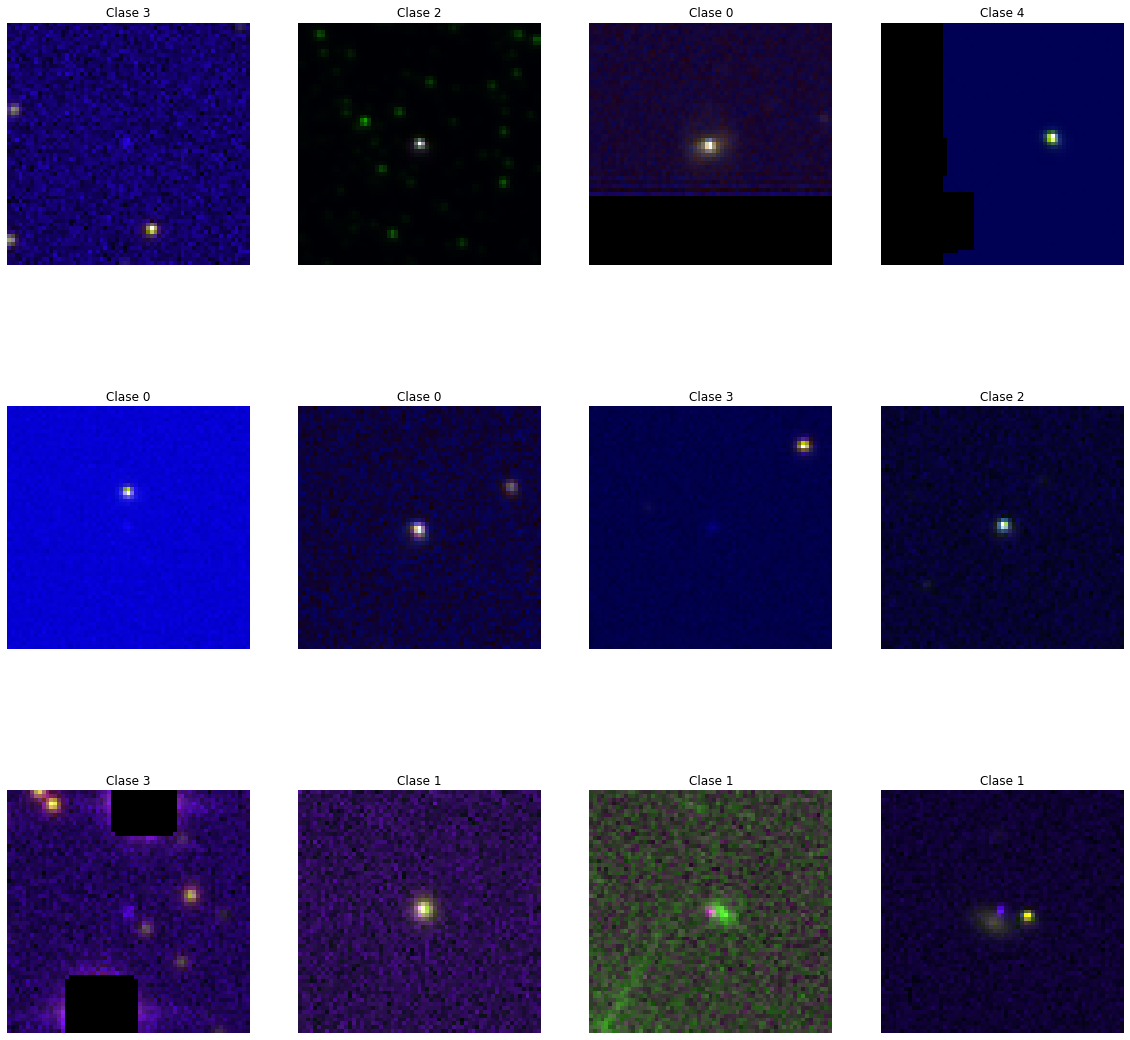

In [7]:
chosen_indices = np.random.RandomState(seed=2).choice(len(data["Train"]["labels"]), size=12, replace=False)
fig, axes = plt.subplots(3, 4, figsize=(20, 20))

for idx, ax in zip(chosen_indices, axes.flat):
    # x, y = train_mnist_dataset[idx]

    x= data["Train"]["images"][idx]
    y= data["Train"]["labels"][idx]
    ax.imshow(x, cmap="gray")
    ax.set_title(f"Clase {y}")
    ax.axis('off')

plt.show()

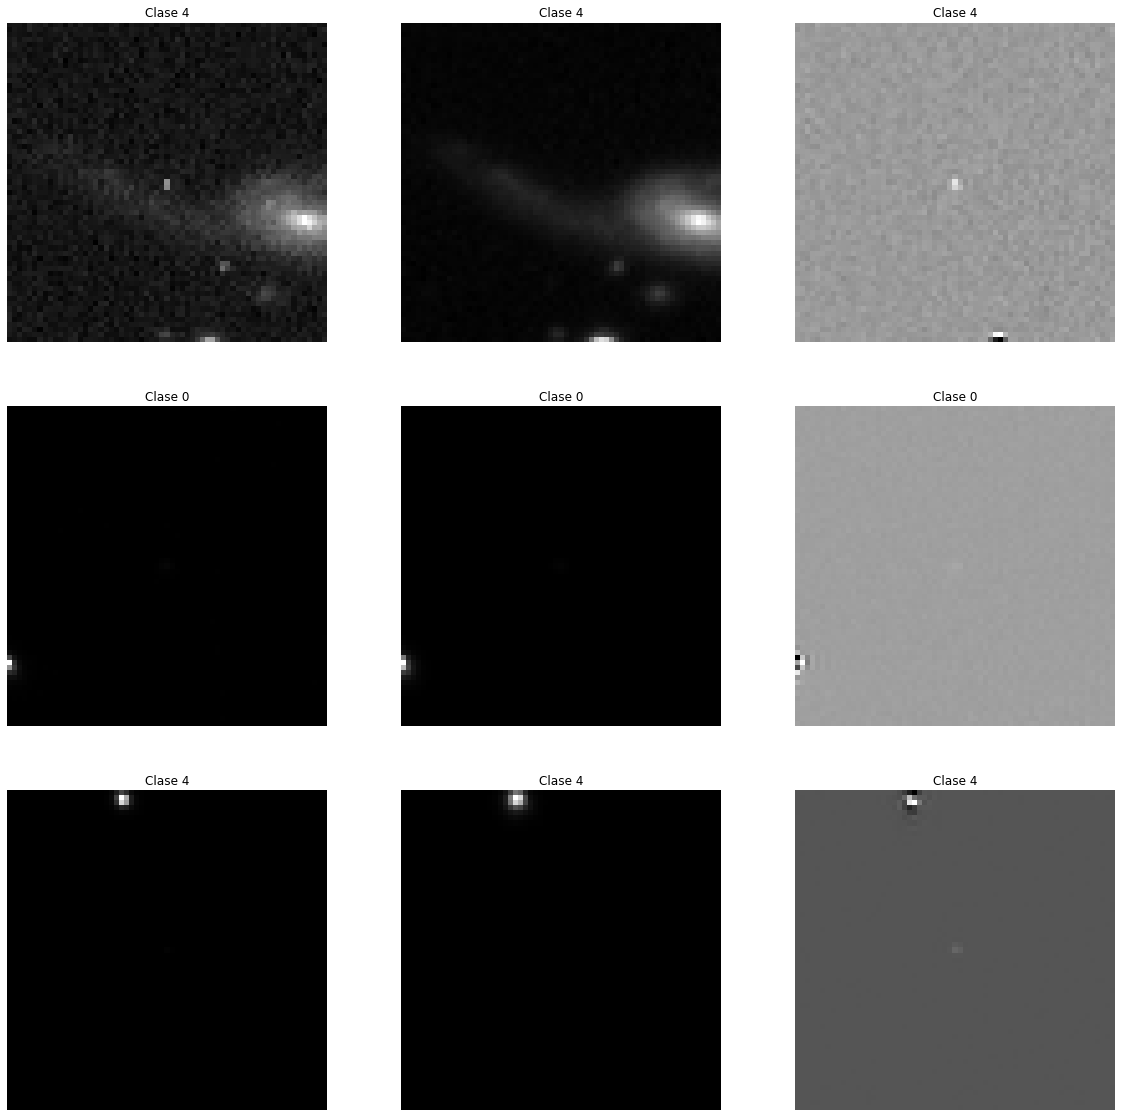

In [8]:
chosen_indices = np.random.RandomState(seed=3).choice(len(data["Train"]["labels"]), size=3, replace=False)
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for idx,i in zip(chosen_indices,[0,1,2]):
    # x, y = train_mnist_dataset[idx]

    x= data["Train"]["images"][idx]
    y= data["Train"]["labels"][idx]
    
    for j in range(3):
        axes[i,j].imshow(x[:,:,j], cmap="gray")
        axes[i,j].set_title(f"Clase {y}")
        axes[i,j].axis('off')
plt.show()

### Distribuciones de algunos features

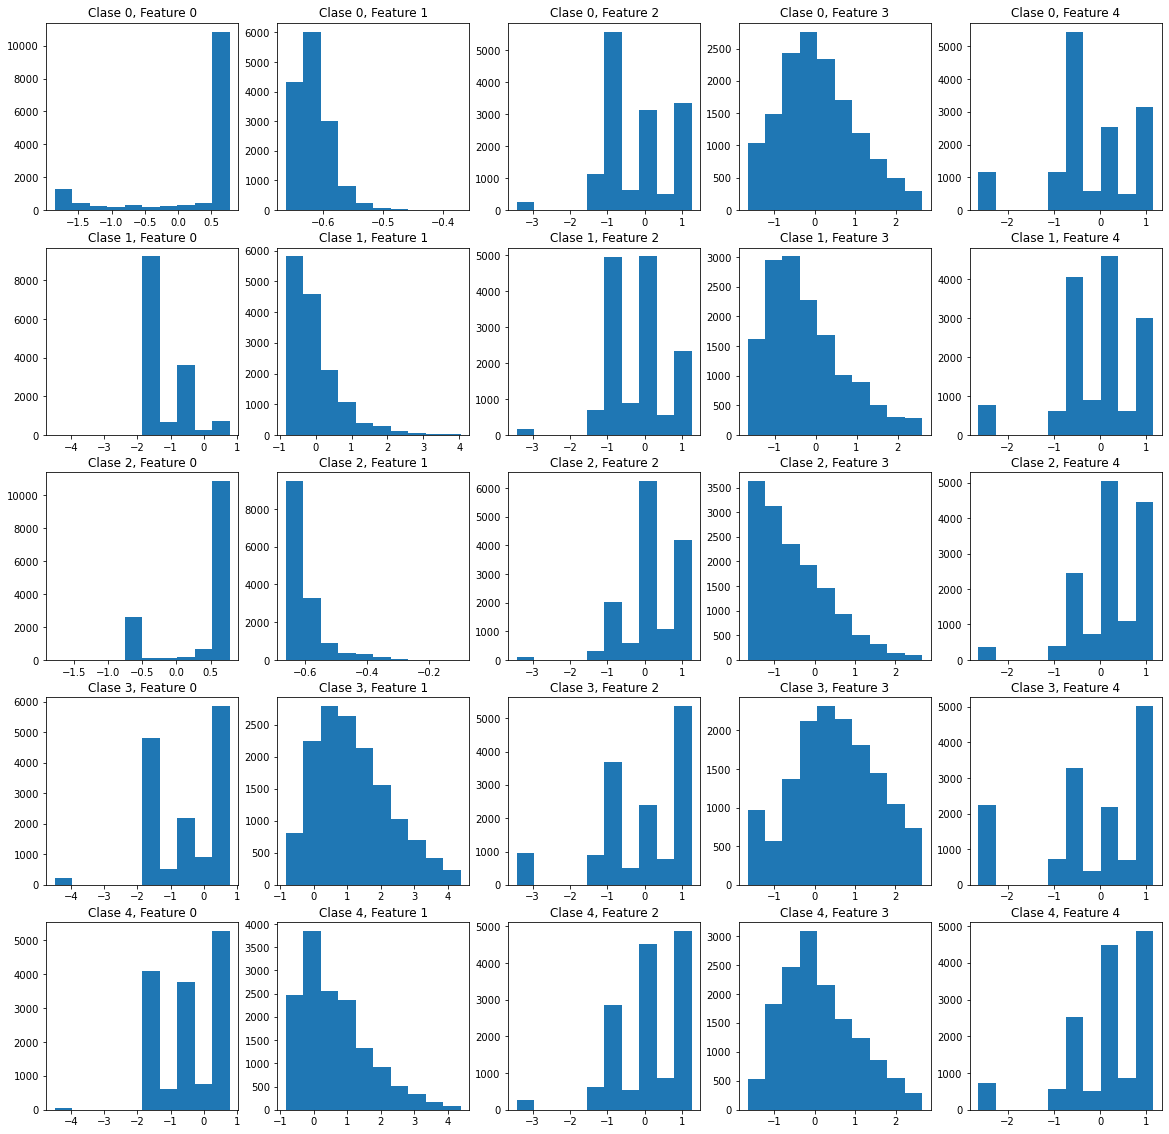

In [9]:
# duda de las clases y su correspondiente numero
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
    filtro=data["Train"]["labels"]==i
    for j in range(5):
        axes[i,j].hist(data["Train"]["features"][:,j][filtro])
        axes[i,j].set_title(f"Clase {i}, Feature {j}")


[]

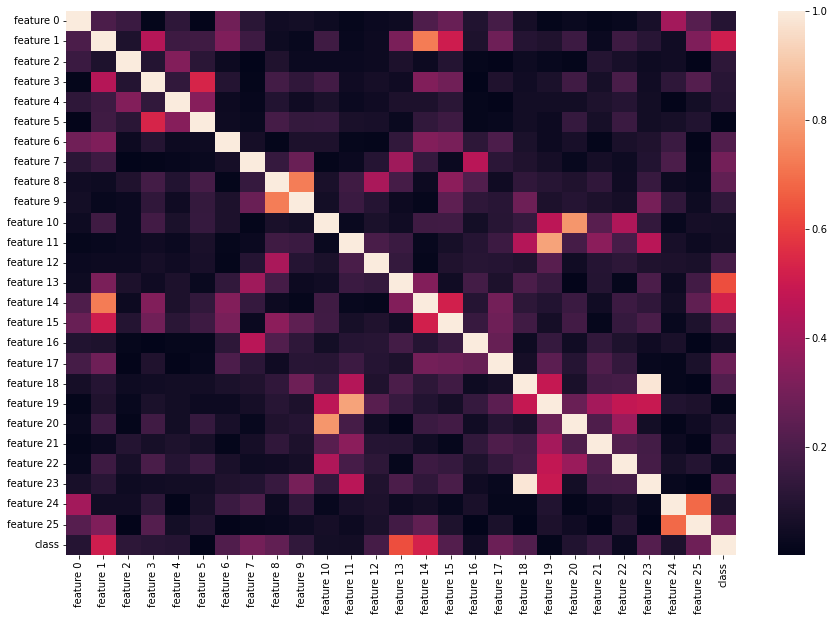

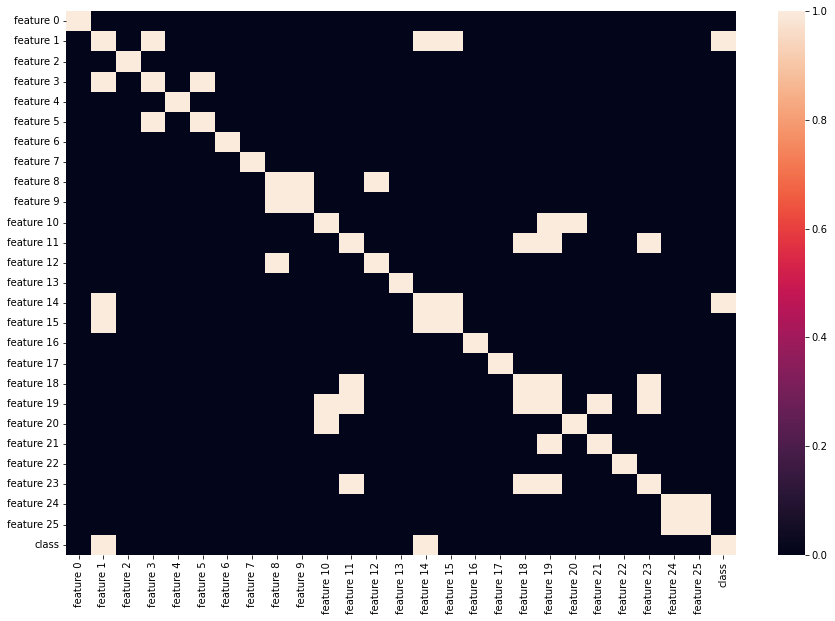

In [10]:
import numpy as np 
from scipy import stats
import pandas as pd
# duda features y numero

# x = data["Train"]["features"]
x=np.array(data["Train"]["features"],dtype="float32")
y = data["Train"]["labels"]
  
df_1 = pd.DataFrame(x,columns=["feature "+str(i) for i in range(26)])
df_2 = pd.DataFrame(y,columns=["class"])
df = pd.concat([df_1, df_2],axis=1)
fig = plt.subplots( figsize=(15, 10))
sns.heatmap(abs(df.corr()))
plt.plot()
fig = plt.subplots( figsize=(15, 10))
sns.heatmap(abs(df.corr()>0.4))
plt.plot()

### SVM

In [11]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

x=np.array(data["Train"]["features"],dtype="float32")

y = data["Train"]["labels"]

scaler = StandardScaler()
scaler.fit_transform(x)
X=scaler.transform(x)

rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X,y)

SVC()

In [12]:
x_test=np.array(data["Test"]["features"],dtype="float32")
X_test=scaler.transform(x_test)
predict=rbf_svc.predict(X_test)

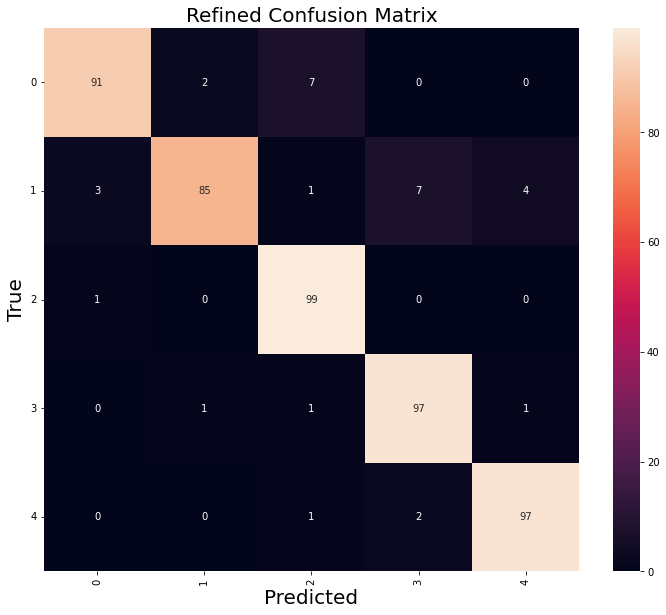

In [13]:
# y_predicted = predict
class_prediction = predict
# https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python
from sklearn.metrics import confusion_matrix
import seaborn as sns

# labels = le.classes_
class_names =  ["0","1","2","3","4"]

cm = confusion_matrix(data["Test"]["labels"], class_prediction)
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

# plt.savefig('ConMat24.png')
plt.show()

In [14]:
# !pip install
# !pip install git+https://github.com/alercebroker/alerce_client_new.git#egg=alerce --no-deps
# from alerce.core import Alerce
# alerce_client = Alerce()


# Auto encoder 

Prototipo

In [12]:
import torch
from torch import nn
# duda cuantos bloques
class AutoEncoderV1(nn.Module):
    def __init__(
        self,
        # kernel_conv
    ):
        super().__init__()
        self.encoder = nn.Sequential(
            # Bloque 1
            nn.Conv2d(3, 16, kernel_size=5, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),

            # # Bloque 2
            nn.Conv2d(16, 32, kernel_size=5, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),

            # # Bloque 2
            nn.Conv2d(32, 64, kernel_size=5, padding="same"),
            nn.ReLU(),
        )

        self.code=nn.Sequential(
            nn.MaxPool2d(kernel_size=7),
        )

        self.decoder = nn.Sequential(
            # BLoque 1
            nn.ConvTranspose2d(64, 32, 5,stride=1),
            nn.ReLU(),
            nn.Upsample(size=(7,7), mode='nearest'),

            # BLoque 2
            nn.ConvTranspose2d(32, 16, 5,stride=1),
            nn.ReLU(),
            nn.Upsample(size=(21,21), mode='nearest'),

            # BLoque 3
            nn.ConvTranspose2d(16, 3, 5,stride=1),
            nn.ReLU(),
            nn.Upsample(size=(63,63), mode='nearest'),
        )
        
        self.net = nn.Sequential(
            self.encoder,
            self.code,
            # self.decoder,
        )

    
        
    #     return self.net(x)
    def forward(self, x):
        x_resize=x.reshape(1,3,63,63)
        x_result=self.net(x_resize)
        # x_return=x.reshape(63,63,3)
        
        return x_result


In [ ]:
model = AutoEncoderV1()
prueba=torch.tensor(data["Train"]["images"][1])
# prueba=prueba, (3, 63,63).unsqueeze(0)
# duda dimensiones
print("tamaño original imagen", torch.tensor(data["Train"]["images"][1]).shape)
print("entrada red",prueba.shape)
print("salida red",model(prueba).shape)

## Preprocesamiento

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

my_x = data["Train"]["images"].reshape(72710, 3, 63, 63) # a list of numpy arrays
my_y = data["Train"]["images"] # another list of numpy arrays (targets)

tensor_x = torch.Tensor(my_x) # transform to torch tensor
tensor_y = torch.Tensor(my_x)

my_datatrain = TensorDataset(tensor_x,tensor_y) # create your datset
# my_datatrain = DataLoader(my_dataset) # create your dataloader

my_x = data["Validation"]["images"].reshape(500, 3, 63, 63) # a list of numpy arrays
my_y = data["Validation"]["images"] # another list of numpy arrays (targets)

tensor_x = torch.Tensor(my_x) # transform to torch tensor
tensor_y = torch.Tensor(my_x)

my_dataval = TensorDataset(tensor_x,tensor_y) # create your datset
# my_dataval = DataLoader(my_dataset) # create your dataloader

In [13]:
import torch
from torch import nn
class AutoEncoderV2(nn.Module):
    def __init__(
        self,
        # kernel_conv
    ):
        super().__init__()
        self.encoder = nn.Sequential(
            # Bloque 1
            nn.Conv2d(3, 16, kernel_size=5, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),

            # # Bloque 2
            nn.Conv2d(16, 32, kernel_size=5, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),

            # # Bloque 2
            nn.Conv2d(32, 64, kernel_size=5, padding="same"),
            nn.ReLU(),
        )

        self.code=nn.Sequential(
            nn.MaxPool2d(kernel_size=7),
        )

        self.decoder = nn.Sequential(
            # BLoque 1
            nn.ConvTranspose2d(64, 32, 5,stride=1),
            nn.ReLU(),
            nn.Upsample(size=(7,7), mode='nearest'),

            # BLoque 2
            nn.ConvTranspose2d(32, 16, 5,stride=1),
            nn.ReLU(),
            nn.Upsample(size=(21,21), mode='nearest'),

            # BLoque 3
            nn.ConvTranspose2d(16, 3, 5,stride=1),
            nn.ReLU(),
            nn.Upsample(size=(63,63), mode='nearest'),
        )
        
        self.net = nn.Sequential(
            self.encoder,
            self.code,
            self.decoder,
        )

    def forward(self, x):
        
        return self.net(x)

tamaño original imagen torch.Size([63, 63, 3])
entrada red torch.Size([63, 63, 3])
salida red torch.Size([1, 64, 1, 1])


In [5]:
model = AutoEncoderV2()
prueba=torch.tensor(data["Train"]["images"][1])
prueba=prueba.reshape(1,3,63,63)
# duda dimensiones
print("tamaño original imagen", torch.tensor(data["Train"]["images"][1]).shape)
print("entrada red",prueba.shape)
print("salida red",model(prueba).shape)

tamaño original imagen torch.Size([63, 63, 3])
entrada red torch.Size([1, 3, 63, 63])
salida red torch.Size([1, 3, 63, 63])


## Protitipo 2

In [9]:
import torch
from torch import nn
class AutoEncoderV2(nn.Module):
    def __init__(
        self,
        # kernel_conv
    ):
        super().__init__()
        self.encoder = nn.Sequential(
            # Bloque 1
            nn.Conv2d(3, 16, kernel_size=5, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),

            # # Bloque 2
            nn.Conv2d(16, 32, kernel_size=5, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),

            # # Bloque 2
            nn.Conv2d(32, 64, kernel_size=5, padding="same"),
            nn.ReLU(),
        )

        self.code=nn.Sequential(
            nn.MaxPool2d(kernel_size=7),
        )

        self.decoder = nn.Sequential(
            # BLoque 1
            nn.ConvTranspose2d(64, 32, 5,stride=1),
            nn.ReLU(),
            nn.Upsample(size=(7,7), mode='nearest'),

            # BLoque 2
            nn.ConvTranspose2d(32, 16, 5,stride=1),
            nn.ReLU(),
            nn.Upsample(size=(21,21), mode='nearest'),

            # BLoque 3
            nn.ConvTranspose2d(16, 3, 5,stride=1),
            nn.ReLU(),
            nn.Upsample(size=(63,63), mode='nearest'),
        )
        
        self.net = nn.Sequential(
            self.encoder,
            self.code,
            self.decoder,
        )

    def forward(self, x):
        
        return self.net(x)

## Entrenamiento

In [10]:
def show_curves(curves):
    fig, ax = plt.subplots(1, 2, figsize=(13, 5))
    fig.set_facecolor('white')

    epochs = np.arange(len(curves["val_loss"])) + 1

    ax[0].plot(epochs, curves['val_loss'], label='validation')
    ax[0].plot(epochs, curves['train_loss'], label='training')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss evolution during training')
    ax[0].legend()

    ax[1].plot(epochs, curves['val_acc'], label='validation')
    ax[1].plot(epochs, curves['train_acc'], label='training')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy evolution during training')
    ax[1].legend()

    plt.show()

In [11]:
import time
def train_step(x_batch, y_batch, model, optimizer, criterion, use_gpu):
    # Predicción
    y_predicted = model(x_batch)

    # Cálculo de loss
    loss = criterion(y_predicted, y_batch)

    # Actualización de parámetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return y_predicted, loss


def evaluate(val_loader, model, criterion, use_gpu):
    cumulative_loss = 0
    cumulative_predictions = 0
    data_count = 0

    for x_val, y_val in val_loader:
        if use_gpu:
            x_val = x_val.cuda()
            y_val = y_val.cuda()

        y_predicted = model(x_val)
        
        loss = criterion(y_predicted, y_val)

        # class_prediction = torch.argmax(y_predicted, axis=1).long()

        # cumulative_predictions += (y_val == class_prediction).sum().item()
        cumulative_loss += loss.item()
        data_count += y_val.shape[0]

    # val_acc = cumulative_predictions / data_count
    val_loss = cumulative_loss / len(val_loader)

    return val_loss


def train_model(
    model,
    train_dataset,
    val_dataset,
    epochs,
    criterion,
    batch_size,
    lr,
    n_evaluations_per_epoch=6,
    use_gpu=False,
):


    if use_gpu:
        model.cuda()

    # Definición de dataloader
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=use_gpu)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False, pin_memory=use_gpu)

    # Optimizador
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Listas para guardar curvas de entrenamiento
    curves = {
        # "train_acc": [],
        # "val_acc": [],
        "train_loss": [],
        "val_loss": [],
    }

    t0 = time.perf_counter()

    iteration = 0

    n_batches = len(train_loader)

    for epoch in range(epochs):
        print(f"\rEpoch {epoch + 1}/{epochs}")
        cumulative_train_loss = 0
        cumulative_train_corrects = 0
        train_loss_count = 0
        train_acc_count = 0

        # Entrenamiento del modelo
        model.train()
        for i, (x_batch, y_batch) in enumerate(train_loader):
            if use_gpu:
                x_batch = x_batch.cuda()
                y_batch = y_batch.cuda()

            y_predicted, loss = train_step(x_batch, y_batch, model, optimizer, criterion, use_gpu)

            cumulative_train_loss += loss.item()
            train_loss_count += 1
            train_acc_count += y_batch.shape[0]

            # Calculamos número de aciertos
            # class_prediction = torch.argmax(y_predicted, axis=1).long()
            # cumulative_train_corrects += (y_batch == class_prediction).sum().item()

            if (i % (n_batches // n_evaluations_per_epoch) == 0) and (i > 0):
                train_loss = cumulative_train_loss / train_loss_count
                # train_acc = cumulative_train_corrects / train_acc_count

                print(f"Iteration {iteration} - Batch {i}/{len(train_loader)} - Train loss: {train_loss}")

            iteration += 1

        model.eval()
        with torch.no_grad():
            val_loss = evaluate(val_loader, model, criterion, use_gpu)

        print(f"Val loss: {val_loss}")

        train_loss = cumulative_train_loss / train_loss_count
        # train_acc = cumulative_train_corrects / train_acc_count

        # curves["train_acc"].append(train_acc)
        # curves["val_acc"].append(val_acc)
        curves["train_loss"].append(train_loss)
        curves["val_loss"].append(val_loss)

    print()
    print(f"Tiempo total de entrenamiento: {time.perf_counter() - t0:.4f} [s]")

    model.cpu()

    

    return curves

In [12]:
lr = 5e-4
dropout_p = 0.5
batch_size = 64
criterion = nn.MSELoss()

epochs = 3
model_two = AutoEncoderV2()

curves = train_model(
    model_two,
    my_datatrain,
    my_dataval,
    epochs,
    criterion,
    batch_size,
    lr,
    use_gpu=False
)

show_curves(curves)

Epoch 1/3
Iteration 189 - Batch 189/1137 - Train loss: 0.03225322442227288
Iteration 378 - Batch 378/1137 - Train loss: 0.029923719710284614
Iteration 567 - Batch 567/1137 - Train loss: 0.02908159039494857
Iteration 756 - Batch 756/1137 - Train loss: 0.028506782233144207
Iteration 945 - Batch 945/1137 - Train loss: 0.028096738107990765
Iteration 1134 - Batch 1134/1137 - Train loss: 0.02782918643124303
Val loss: 0.026881352066993713
Epoch 2/3
Iteration 1326 - Batch 189/1137 - Train loss: 0.02681649548834876
Iteration 1515 - Batch 378/1137 - Train loss: 0.026695575609331394
Iteration 1704 - Batch 567/1137 - Train loss: 0.026748790192535857
Iteration 1893 - Batch 756/1137 - Train loss: 0.026748073303301867
Iteration 2082 - Batch 945/1137 - Train loss: 0.026684624725759786
Iteration 2271 - Batch 1134/1137 - Train loss: 0.02663201648528618
Val loss: 0.02680673636496067
Epoch 3/3
Iteration 2463 - Batch 189/1137 - Train loss: 0.026193070460699106
Iteration 2652 - Batch 378/1137 - Train loss: 

: 

: 